# Implementing Binary Classification Algorithm

##### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Reading The Data

In [2]:
df = pd.read_csv('data.txt',names = ['X1','X2','Y'])

##### Preparing The Data

In [3]:
#The first five rows from the data
df.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#Inserting X0 in the data
df.insert(0,'X0',1)

In [5]:
df.head()

,X0,X1,X2,Y
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [58]:
#Splitting the data to x and y
x = np.matrix(df[['X0','X1','X2']])
y = np.matrix(df['Y'])

##### Plotting The Data

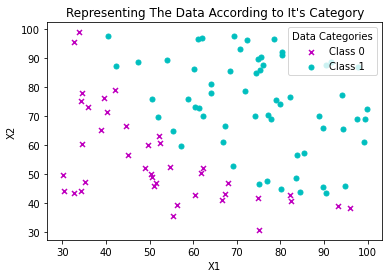

In [99]:
class_1 = df[df['Y'] == 1]
class_0 = df[df['Y'] == 0]
plt.scatter(class_0['X1'],class_0['X2'],c = 'm',marker = 'x',label = 'Class 0',s = 25)
plt.scatter(class_1['X1'],class_1['X2'],c = 'c',marker = 'o',label = 'Class 1',s = 25)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Representing The Data According to It's Category")
plt.legend(title = ('Data Categories'))
plt.show()

- Most of the data with the class 1.

##### Required Functions

In [328]:
def sigmoid(z):
    '''
    This function for applying the sigmoid task.
    INPUT:
    z: numpy.matrix. The result of transposing the theta matrix and multiplying it with x matrix.
    OUTPUT:
    The sigmoid value.
    '''
    return 1 / (1 + np.exp(-z))

def cost_fun(x,y,theta):
    '''
    This function for calculating the binary logistic regression error.
    INPUT:
    x: numpy.matrix. The features.
    y: numpy.matrix. The label.
    theta: numpy.matrix. The weights.
    OUTPUT:
    The value of the error.
    '''
    oper1 = - (np.multiply(y,np.log(sigmoid(x * theta.T))))
    oper2 = - (np.multiply(1 - y,np.log(1 - sigmoid(x * theta.T))))
    return (1 / x.shape[0]) * np.sum(oper1 + oper2)

def gradient_descent(x,y,theta,iterations,alpha):
    '''
    This function for optimizing the theta values.
    INPUT:
    x: numpy.matrix. The features.
    y: numpy.matrix. The label.
    theta: numpy.matrix. The weights.
    iterations: int. The number of iterations.
    alpha: float. The learning rate.
    OUTPUT:
    The optimized theta.
    '''
    opt_theta = np.matrix(np.zeros(theta.shape[1]))
    for _ in range(iterations):
        error = sigmoid(x * theta.T) - y
        for idx in range(theta.shape[1]):
            mult_val = np.multiply(error,x[:,idx])
            opt_theta[:,idx] = theta[:,idx] - (alpha * np.sum(mult_val))
        theta = opt_theta
    return theta

##### Applying Gradient Descent On The Data

In [477]:
#Initializing theta
theta = np.matrix(np.array([0,0,0]))
#The optimized theta
opt_theta = gradient_descent(x,y,theta,iterations = 10000,alpha = 0.0000001)

In [478]:
opt_theta

matrix([[ 0.02491499, -0.00319698, -0.00296003]])

In [479]:
cost_fun(x,y,opt_theta)

75.00809825130351